## Brexit tweet analysis for 2016
In this project you will analyse a dataset that contains Brexit tweet and retweet data from 2016.

#### Q1. Import the data file "brexit_tweet_count_by_data.csv" into a Pandas DataFrame object. The data contains two entries for each date corresponding to tweets (``retweet = False``) and retweets (``retweet=True``). Pivot the data so that each date is on a single row and with separate columns for tweets and retweets.

In [1]:
import pandas as pd
brexit_tweet = pd.read_csv("brexit_tweet_count_by_data.csv", parse_dates=['date'], index_col='date')

# Pivot the data 
PivotTable = brexit_tweet.pivot_table(values="total_count", index="date", columns="retweet", aggfunc="sum", fill_value=0)

# Rename the columns to "tweets" and "retweets"
PivotTable.columns = ["tweets", "retweets"]

print(PivotTable)

            tweets  retweets
date                        
2016-01-06     699      1942
2016-01-07    3511      4811
2016-01-08    2401      4752
2016-01-09    1620      4193
2016-01-10    2744      5038
...            ...       ...
2016-12-27   19402     35234
2016-12-28   10653     14351
2016-12-29    9805     16064
2016-12-30   18722     26850
2016-12-31   16485     27770

[333 rows x 2 columns]


#### Q2. Import the plotting library and plot the tweet and retweet data as two separate time series in the same plot. You may use the following plotting code as a starting point.

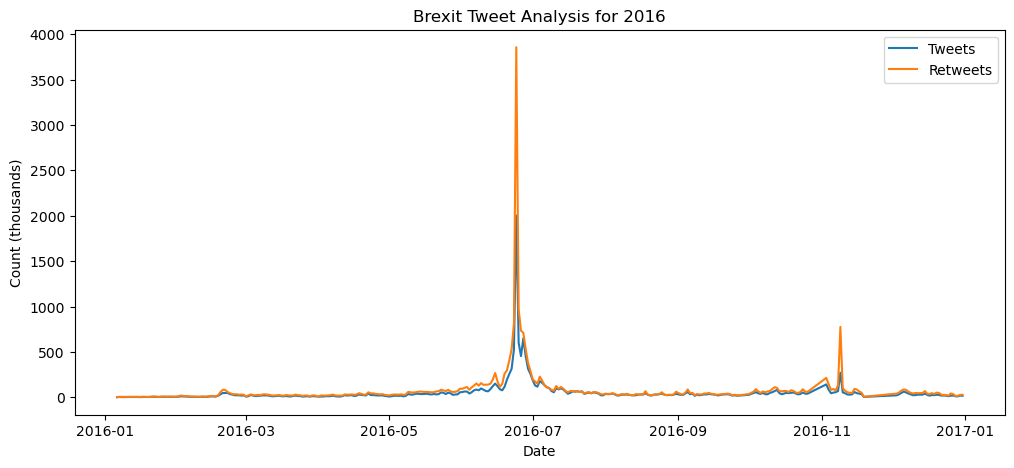

In [2]:
import matplotlib.pyplot as plt

# Create new columns for counts in thousands
PivotTable["tweets_thousands"] = PivotTable["tweets"] / 1000
PivotTable["retweets_thousands"] = PivotTable["retweets"] / 1000

# Create the plot
plt.figure(figsize=(12, 5))
plt.plot(PivotTable.index, PivotTable["tweets_thousands"], label="Tweets")
plt.plot(PivotTable.index, PivotTable["retweets_thousands"], label="Retweets")

# Format the plot
plt.legend()
plt.title("Brexit Tweet Analysis for 2016")
plt.xlabel("Date")
plt.ylabel("Count (thousands)")
plt.show()

#### Q3. You will observe that there are two peaks in the data, one in summer and one in autumn. Create a new column in the dataframe that combines the tweets and retweets. Find the 10 most active dates for the tweets+retweets and use it to identify the exact dates of the two significant spikes in tweet and retweet activity (one in summer and one in autumn). 
Hint: consider using ``np.max`` and ``np.argmax`` functions.

In [3]:
import numpy as np

# Create a new column in the dataframe that combines the tweets and retweets
PivotTable["total"] = PivotTable["tweets"] + PivotTable["retweets"]

# Make the "total" column to a NumPy array
total = np.array(PivotTable["total"])

# Create empty lists for the counts and dates
top10_counts = []
top10_dates = []

# Find the top 10 active dates for the tweets and retweets and their corresponding dates 
for i in range(10):
    value = np.max(total) 
    top10_counts.append(value)
    
    # Find the index of the max value and get the corresponding date
    max_index = np.argmax(total)
    top10_dates.append(PivotTable.index[max_index].strftime('%Y-%m-%d')) 

    total[max_index] = -1

# Print the results
print(top10_counts)
print(top10_dates)


[5859019, 1573243, 1359964, 1343349, 1187298, 1045761, 984286, 841524, 693349, 659127]
['2016-06-24', '2016-06-25', '2016-06-27', '2016-06-23', '2016-06-26', '2016-11-09', '2016-06-28', '2016-06-22', '2016-06-29', '2016-06-21']


#### Answer Q3: Print out the dates of the summer and autumn spikes. What is the significance of these dates?

In [4]:
# Create variables for the calculations
summer_spike_count = 0
summer_spike_date = ''
autumn_spike_count = 0
autumn_spike_date = ''

# Calculate the most dates of the summer and autumn spikes
for count, date in zip(top10_counts, top10_dates):
    if date[5:7] == '06':
        if count > summer_spike_count:
            summer_spike_count = count
            summer_spike_date = date
            
    if date[5:7] == '11':
        if count > autumn_spike_count:
            autumn_spike_count = count
            autumn_spike_date = date

# Print the results and significance of the dates
print(f"{summer_spike_date} has the most significant tweet and retweet activities in Summer 2016 as the results of the Brexit referendum provoked discussions and reactions.")
print (f"{autumn_spike_date} has the most significant tweet and retweet activities in Autumn 2016 as the U.S. presidential election raised discussions about the potential implications for the UK post-Brexit.")


2016-06-24 has the most significant tweet and retweet activities in Summer 2016 as the results of the Brexit referendum provoked discussions and reactions.
2016-11-09 has the most significant tweet and retweet activities in Autumn 2016 as the U.S. presidential election raised discussions about the potential implications for the UK post-Brexit.


#### Q4. Create a new ``DataFrame`` which groups the data by day of the week and calculate the cumulative tweet and retweet counts for each day of the week. Reorder this data by number of tweets (in decending order). Which day has the highest average tweet count?
Hint: Consider using ``.to_datetime`` and ``.day_name()`` functions.

In [5]:

# Create a new DataFrame grouped the data by day of the week
PivotTable.index = pd.to_datetime(PivotTable.index)
new_df = PivotTable.groupby(PivotTable.index.day_name()).agg(cumulative_tweets=('tweets', 'sum'),cumulative_retweets=('retweets', 'sum'))

# Calculate the cumulative tweet and retweets counts for each day of the week in decending order
new_df.sort_values(by='cumulative_tweets', ascending=False)
new_df['average_tweets'] = new_df['cumulative_tweets'] / PivotTable.index.day_name().value_counts()

# Find the day with the highest average tweet count
highest_average_tweets = new_df['average_tweets'].max()
top_day = new_df['average_tweets'].idxmax()

#### Answer Q4: Print out the day of the week with most tweets.

In [6]:
print(f"{top_day} with an average of {highest_average_tweets:.0f} tweets.")

Friday with an average of 77035 tweets.


#### Q5. Remove the top 10 dates with the highest tweet+retweet count from the data and repeat the analysis for tweets across week days.

In [7]:
# Remove the top 10 dates with the highest tweet and retweet count from the data
filtered_PivotTable = PivotTable[~PivotTable.index.strftime('%Y-%m-%d').isin(top10_dates)]

# Group the data by day of the week after removing the spikes
filtered_PivotTable.index = pd.to_datetime(filtered_PivotTable.index)
new_df2 = filtered_PivotTable.groupby(filtered_PivotTable.index.day_name()).agg(cumulative_tweets=('tweets', 'sum'),cumulative_retweets=('retweets', 'sum'))

# Calculate the cumulative tweet and retweets counts for each day of the week in decending order
new_df2['average_tweets'] = new_df2['cumulative_tweets'] / filtered_PivotTable.index.day_name().value_counts()

# Find the day with the highest average tweet count
highest_average_tweets2 = new_df2['average_tweets'].max()
top_day2 = new_df2['average_tweets'].idxmax()


#### Answer Q5: Print out the day of the week with most tweets after removing the spikes.

In [8]:
print(f"{top_day2} with an average of {highest_average_tweets2:.0f} tweets.")

Thursday with an average of 42475 tweets.
